# Multi-metric runs
------------------------------

This example shows how to evaluate an atom's pipeline on multiple metrics.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
import pandas as pd
from sklearn.datasets import load_breast_cancer
from atom import ATOMRegressor

In [2]:
# Load data
X = pd.read_csv("./datasets/abalone.csv")

# Let's have a look
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Run the pipeline

In [3]:
atom = ATOMRegressor(X, n_jobs=1, verbose=2, warnings=False, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (4177, 9)
Scaled: False
Categorical features: 1 (12.5%)
Outlier values: 182 (0.6%)
-------------------------------------
Train set size: 3342
Test set size: 835
-------------------------------------



In [4]:
atom.encode()

Fitting Encoder...
Encoding categorical columns...
 --> OneHot-encoding feature Sex. Contains 3 classes.


In [5]:
# For every step of the BO, both metrics are calculated,
# but only the first is used for optimization!
atom.run(
    models=["lsvm", "hGBM"],
    metric=("r2", "mse"),
    n_calls=10,
    n_initial_points=4,
    n_bootstrap=6,
)


Training ========================= >>
Models: lSVM, hGBM
Metric: r2, neg_mean_squared_error


Running BO for Linear-SVM...
| call             |    loss |       C |    loss |      r2 | best_r2 | neg_mean_squared_error | best_neg_mean_squared_error |    time | total_time |
| ---------------- | ------- | ------- | ------- | ------- | ------- | ---------------------- | --------------------------- | ------- | ---------- |
| Initial point 1  | squar.. |  46.003 | squar.. |  0.4451 |  0.4451 |                -6.6842 |                     -6.6842 |  0.019s |     0.030s |
| Initial point 2  | squar.. |   0.015 | squar.. |  0.4007 |  0.4451 |                -6.4677 |                     -6.4677 |  0.016s |     0.219s |
| Initial point 3  | epsil.. |   2.232 | epsil.. |  0.4421 |  0.4451 |                -6.0536 |                     -6.0536 |  0.043s |     0.318s |
| Initial point 4  | squar.. |   0.037 | squar.. |   0.445 |  0.4451 |                -5.9243 |                     -5.9243 |  0.02

## Analyze the results

In [6]:
# The columns in the results dataframe contain a list of
# scores, one for each metric (in the same order as called)
atom.results[["metric_bo", "metric_train", "metric_test"]]

,metric_bo,metric_train,metric_test
lSVM,"[0.46823718247604573, -6.376213545619027]","[0.4600429544670509, -5.696619820772378]","[0.45338714637643485, -5.33647335500683]"
hGBM,"[0.5561521256959545, -5.322050987899658]","[0.680731527851431, -3.3683255392919382]","[0.5734034657163947, -4.164777727877006]"


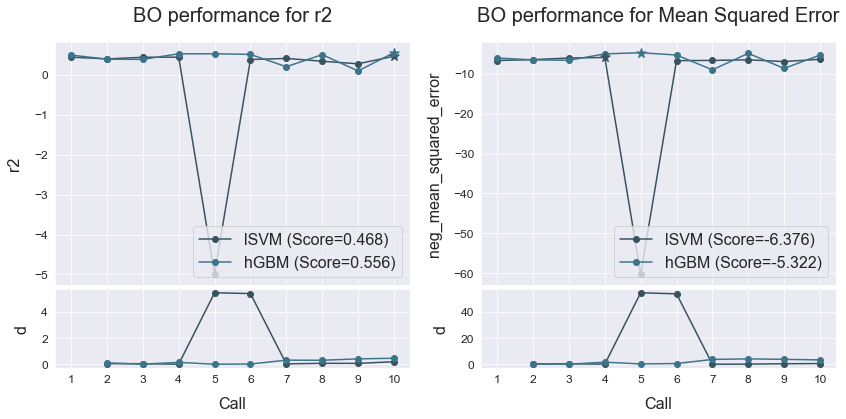

In [7]:
# Some plots allow us to choose the metric we want to show
with atom.canvas():
    atom.plot_bo(metric="r2", title="BO performance for r2")
    atom.plot_bo(metric="mse", title="BO performance for Mean Squared Error")

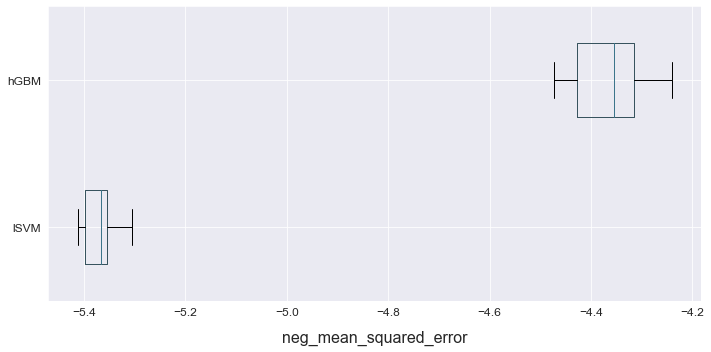

In [8]:
atom.plot_results(metric="mse")